

Build **kNN** and **logistic regression** classifiers using sklearn library to predict "passed" (label variable) by using given data. 
- Start the project with data processing such as converting non-numeric values to numerical ones,  data normalization, etc.
- Explore and analyze the data using feature visualization such as correlation heatmap, and distribution plots by commenting on your findings. Choose min. 3 features for the visualization step. 
- Then, shuffle and split your data into train and test sets randomly, with a ratio of 70:30. (Write your own shuffling and spliting code, do not use predefined function train_test_split).
- Build your models (with proper comments and explanations) using the training set.
- Compare these 2 classification models according to their accuracies (you can print accuracy values in a single table as a comprehensive view) over the test set. Comment on their classification performance.
- Plot confusion matrices for your models over the test set, and comment on the outcomes. 
- Finally, plot Precision-Recall (PR) curves for each classification model over the test set and evaluate/comment the prediction performance of each classifier. 

Notes:

* Choose the optimal k value using Minkowski distance (by trying two different p-values) for the kNN model.


* **Don't forget to add comments to your code lines to explain how your program works, and your intentions behind it. Also, do not forget to comment on the outcomes and comparisons.** 

In [1]:
import pandas as pd
data = pd.read_csv('data.csv')
if data.isnull().values.any() == False: print("There is no missing values in this dataset.")

There is no missing values in this dataset.


In [2]:
# showing all columns
data.iloc[:,0:16].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no


In [3]:
data.iloc[:,16:31].head()

,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,no
1,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,no
2,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,yes
3,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,yes
4,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,yes


In [4]:
# REPLACING ALL NON-NUMERIC VALUES TO NUMERICAL

# All attributes which have binary responses which are 'yes' or 'no' - yes:1 no:0
data = data.replace(to_replace = ['no', 'yes'], value = [0, 1])

# School - MS: 0, GP: 1
data = data.replace(to_replace = ['MS', 'GP'], value = [0, 1]) 

# Sex - Female: 0, Male: 1
data = data.replace(to_replace = ['F', 'M'], value = [0, 1])

# Adress - Rural: 0, Urban: 1
data = data.replace(to_replace = ['R','U'], value = [0, 1])

# Family size - Less or Equal to 3: 3, Greater Than 3: 4
data = data.replace(to_replace = ['LE3','GT3'], value = [3, 4]) 

# Parent's status - Apart: 0, Together: 1
data = data.replace(to_replace = ['A','T'], value = [0, 1]) 

# Mother's job, Father's job - At home: 0, Teacher: 1, Health: 2, Services: 3, Other: 4 
data = data.replace(to_replace = ['at_home', 'teacher', 'health', 'services', 'other'], value = [0, 1, 2, 3, 4])

# Reason to choose this school - Close to home: 0, School reputation: 1, Course preference: 2, Other: 3
data = data.replace(to_replace = ['home', 'reputation', 'course', 'other'], value = [0, 1, 2, 3])

# Guardian of student - Mother: 0, Father: 1, Other: 2
data = data.replace(to_replace = ['mother', 'father', 'other'], value = [0, 1, 2])

In [5]:
#showing all columns after converting
data.iloc[:,0:16].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup
0,1,0,18,1,4,0,4,4,0,1,2,0,2,2,0,1
1,1,0,17,1,4,1,1,1,0,4,2,1,1,2,0,0
2,1,0,15,1,3,1,1,1,0,4,4,0,1,2,3,1
3,1,0,15,1,4,1,4,2,2,3,0,0,1,3,0,0
4,1,0,16,1,4,1,3,3,4,4,0,1,1,2,0,0


In [6]:
data.iloc[:,16:31].head()

,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0,0,0,1,1,0,0,4,3,4,1,1,3,6,0
1,1,0,0,0,1,1,0,5,3,3,1,1,3,4,0
2,0,1,0,1,1,1,0,4,3,2,2,3,3,10,1
3,1,1,1,1,1,1,1,3,2,2,1,1,5,2,1
4,1,1,0,1,1,0,0,4,3,2,1,2,5,4,1


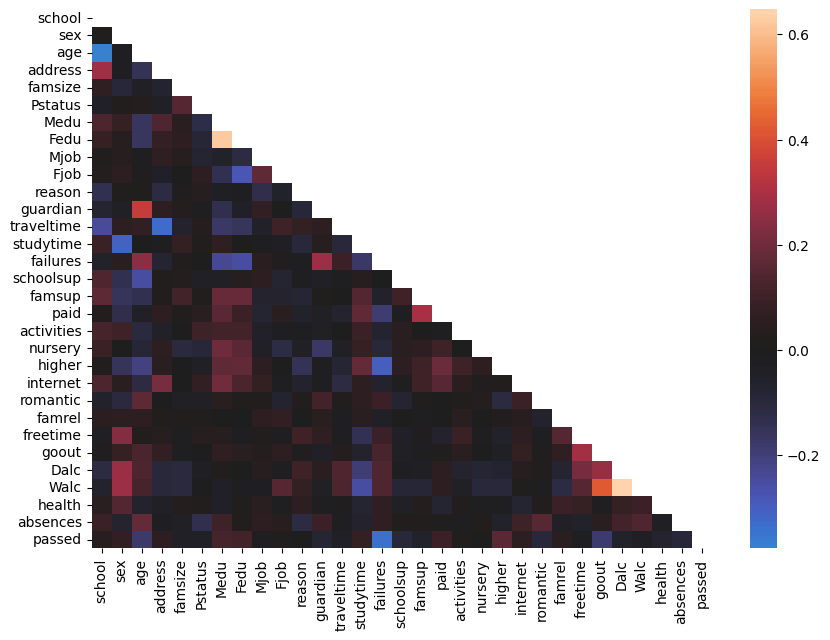

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# plotting correlation heatmap
plt.subplots(figsize=(10, 7))
sns.heatmap(data.corr(), mask=np.triu(np.ones_like(data.corr())), center=0)
plt.show()

Highest correlations in this data are between father's education and mother's education and workday-weekend alcohol consumptions. 

And highest negative correlation with passing the course is number of past class failures.

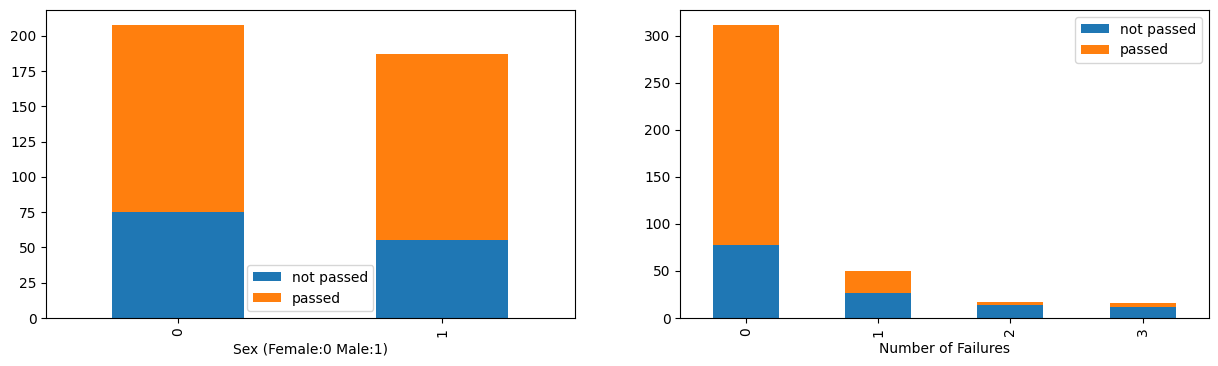

In [8]:
# creating bar plots with three different features to analyze their correlation with 'passed' value
fig, ax = plt.subplots(1,2,figsize = (15,4))

sex_pt = data[['passed','sex']].pivot_table(index='sex',columns=data['passed'], aggfunc='count')
sex_pt.plot(kind='bar', stacked=True,ax=ax[0], xlabel = "Sex (Female:0 Male:1)").legend(labels=["not passed", "passed"])

failures_pt = data[['passed','failures']].pivot_table(index='failures', columns=data['passed'], aggfunc='count')
failures_pt.plot(kind='bar', stacked=True,ax=ax[1], xlabel = "Number of Failures").legend(labels=["not passed", "passed"])


plt.show()

In the first graph, we can see that ratios of passing the course is so similar according to males and females.
Then the second graph, most of students do not have a past class failure and they're more likely to pass the course, when the number of past failures increase, probability of failing this class increase as well.
In the third graph, there is a minority of students that go out with their friends very rarely and their probability of passing the course is higher than the others, when going out frequency increase, ratio of failed students increase.

In [9]:

#shuffling the data and splitting dataset into train and test sets
data = data.sample(frac=1)
train = data.iloc[:int(len(data) * 0.7)]
test = data.iloc[int(len(data) * 0.7):]

In [10]:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error

#declaring features and labels in train and test sets
train_x = train.drop(['passed'],axis=1)
train_y = train['passed']
test_x = test.drop(['passed'],axis=1)
test_y = test['passed']

#creating 1st model with logistic regression
model1 = LogisticRegression()
model1.fit(train_x, train_y)

#finding best k value for 2nd model which is kNN classifier
mse_values = []
for k in range(1,31):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(train_x, train_y)
    prediction = knn.predict(test_x)
    mse = mean_squared_error(y_true = test_y, y_pred = prediction)
    mse_values.append(mse)    
k = mse_values.index(min(mse_values)) + 1

#creating 2nd model with kNN classifier
model2 = KNeighborsClassifier(n_neighbors = k)
model2.fit(train_x, train_y)

#comparing the models' accuracies over test set
print("Accuracy of 1st model:", model1.score(test_x, test_y).round(4))
print("Accuracy of 2nd model:", model2.score(test_x, test_y).round(4))

C:\Users\husey\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy of 1st model: 0.7227
Accuracy of 2nd model: 0.7395


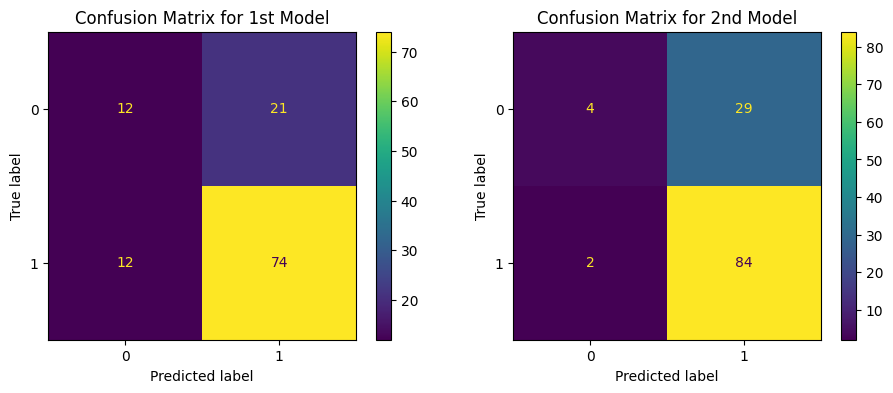

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

#plotting confusion matrices for models
fig, ax = plt.subplots(1, 2, figsize=(11,4))

ConfusionMatrixDisplay(confusion_matrix(test_y, model1.predict(test_x))).plot(ax = ax[0])
ax[0].set_title("Confusion Matrix for 1st Model")

ConfusionMatrixDisplay(confusion_matrix(test_y, model2.predict(test_x))).plot(ax = ax[1])
ax[1].set_title("Confusion Matrix for 2nd Model")

plt.show()

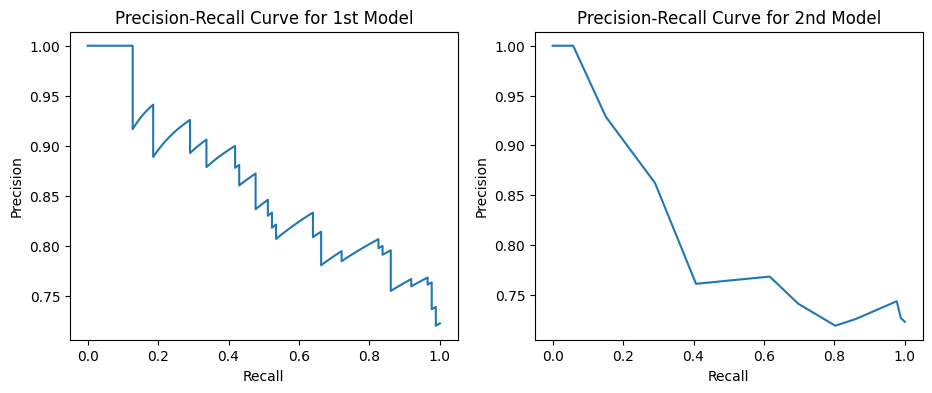

In [12]:
from sklearn.metrics import precision_recall_curve

#plotting precision-recall curves for both models
fig, ax = plt.subplots(1,2, figsize=(11,4))

precision1, recall1, thresholds1 = precision_recall_curve(test_y, model1.predict_proba(test_x)[:, 1])
ax[0].plot(recall1, precision1)
ax[0].set_title('Precision-Recall Curve for 1st Model')
ax[0].set_ylabel('Precision')
ax[0].set_xlabel('Recall')

precision2, recall2, thresholds2 = precision_recall_curve(test_y, model2.predict_proba(test_x)[:, 1])
ax[1].plot(recall2, precision2)
ax[1].set_title('Precision-Recall Curve for 2nd Model')
ax[1].set_ylabel('Precision')
ax[1].set_xlabel('Recall')

plt.show()